In [5]:
# import necessary packages for geospatial analysis and data processing
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import mapclassify as mc

print("Packages imported successfully!")

Packages imported successfully!


# UI Map

In [6]:
map_data = gpd.read_file('./CT_Waterbody_List.geojson')
map_data = GeoDataFrame(map_data)

map_data.set_crs(epsg=4326, inplace=True)
map_data

,OBJECTID,AV_LEGEND,IMS_LEGEND,COASTP_COD,COAST_POLY,NAMEDP_COD,NAMED_POLY,SCALELEVEL,STREAM_NO,STREAM,...,BAY_NO,BAY,HARBOR_NO,HARBOR,SOUND_NO,SOUND,ACREAGE,Shape__Area,Shape__Length,geometry
0,5543,Water,Water,1,Inland Polygons,2,Named Waterbody,3,939,Konkapot River,...,0,,0,,0,,15.574100,6.784092e+05,25839.175991,"POLYGON ((-73.31180 42.04749, -73.31180 42.047..."
1,5544,Water,Water,1,Inland Polygons,2,Named Waterbody,6,0,,...,0,,0,,0,,1.558790,6.790080e+04,1242.913026,"POLYGON ((-73.41916 42.04363, -73.41920 42.043..."
2,5545,Water,Water,1,Inland Polygons,2,Named Waterbody,4,1912,Whiting River,...,0,,0,,0,,3.171260,1.381401e+05,2864.874737,"POLYGON ((-73.25404 42.04197, -73.25411 42.042..."
3,5546,Water,Water,1,Inland Polygons,2,Named Waterbody,6,0,,...,0,,0,,0,,3.357040,1.462326e+05,2447.270341,"POLYGON ((-73.42196 42.03646, -73.42202 42.036..."
4,5547,Water,Water,1,Inland Polygons,2,Named Waterbody,5,0,,...,0,,0,,0,,45.381100,1.976800e+06,7947.896233,"POLYGON ((-73.42443 42.03209, -73.42469 42.031..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5537,11080,Water,Water,1,Inland Polygons,2,Named Waterbody,5,1938,Wilshire Pond Brook,...,0,,0,,0,,10.973300,4.779971e+05,3783.923836,"POLYGON ((-73.65997 41.11125, -73.65986 41.111..."
5538,11081,Water,Water,1,Inland Polygons,2,Named Waterbody,5,1938,Wilshire Pond Brook,...,0,,0,,0,,0.606127,2.640293e+04,678.520891,"POLYGON ((-73.65408 41.10487, -73.65389 41.104..."
5539,11082,Water,Water,1,Inland Polygons,2,Named Waterbody,4,504,East Branch Byram River,...,0,,0,,0,,0.826761,3.601360e+04,923.288218,"POLYGON ((-73.67761 41.08765, -73.67787 41.087..."
5540,11083,Water,Water,1,Inland Polygons,2,Named Waterbody,6,0,,...,0,,0,,0,,0.872652,3.801270e+04,937.084378,"POLYGON ((-73.69207 41.08193, -73.69208 41.081..."


In [7]:
distance = pd.read_csv("./outages_with_waterbody_distances_UI.csv")
distance = distance.dropna()
distance = distance.drop_duplicates()
distance 

,Unnamed: 0,OPCO,CustomerCount,CircuitVoltage,Division,CauseDesc,faultlatitude,faultlongitude,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,0,UI,1,240,UI,Connector Failure,41.244386,-73.121153,POINT (-73.121153 41.244386),5449,1.148701
1,6,UI,7,13800,UI,Bird Contact,41.205595,-73.092755,POINT (-73.092755 41.205595),4575,0.231877
2,10,UI,1,240,UI,Meter,41.353759,-73.081062,POINT (-73.081062 41.353759),3761,0.842063
3,58,UI,3,13800,UI,Recloser,41.417283,-72.844080,POINT (-72.84408 41.417283),3465,1.343529
4,60,UI,3,13800,UI,Tree Contact,41.126300,-73.268896,POINT (-73.268896 41.1263),4758,0.977505
...,...,...,...,...,...,...,...,...,...,...,...
15866,176931,UI,19,240,UI,Fire Department Request,41.283350,-72.930310,POINT (-72.93031 41.28335),4316,0.946339
15867,176968,UI,1,240,UI,Meter,41.175914,-73.202317,POINT (-73.202317 41.175914),2323,1.864377
15868,176972,UI,3,240,UI,Connector Failure,41.192777,-73.177091,POINT (-73.177091 41.192777),2314,0.672435
15869,176976,UI,1926,13800,UI,Lightning Arrestor,41.332436,-72.969962,POINT (-72.969962 41.332436),4012,0.877109


In [8]:
osprey_nests = pd.read_excel('Osprey Data, Confirmed Nests as of 8.2.2023.xlsx', sheet_name='Outages, 2018-Current')
osprey_nests = osprey_nests[['CauseDesc', 'Division', 'OPCO','faultlatitude','faultlongitude']]
osprey_nests = osprey_nests.dropna()
osprey_nests = osprey_nests.drop_duplicates()
osprey_nests = osprey_nests.loc[osprey_nests["OPCO"] == "UI"]
osprey_nests

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude
106,Bird Contact,UI,UI,41.164471,-73.231681
107,Bird Contact,UI,UI,41.203984,-73.278050
108,Bird Contact,UI,UI,41.253498,-72.880776
109,Bird Contact,UI,UI,41.397711,-72.842176
110,Bird Contact,UI,UI,41.270923,-73.203807
...,...,...,...,...,...
10994,Bird Contact,UI,UI,41.186951,-73.182690
10995,Bird Contact,UI,UI,41.206792,-73.155021
11008,Bird Contact,UI,UI,41.241849,-72.986063
11009,Bird Contact,UI,UI,41.276631,-73.044707


In [9]:
new = osprey_nests.merge(distance, on = ['CauseDesc', 'Division', 'OPCO','faultlatitude','faultlongitude'], how = 'left')
osprey_nests = new.dropna()
osprey_nests

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,Unnamed: 0,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Bird Contact,UI,UI,41.164471,-73.231681,9001.0,5.0,13800.0,POINT (-73.231681 41.164471),4603.0,0.440850
1,Bird Contact,UI,UI,41.164471,-73.231681,11126.0,5.0,13800.0,POINT (-73.231681 41.164471),4603.0,0.440850
2,Bird Contact,UI,UI,41.164471,-73.231681,42269.0,5.0,13800.0,POINT (-73.231681 41.164471),4603.0,0.440850
3,Bird Contact,UI,UI,41.164471,-73.231681,60414.0,5.0,13800.0,POINT (-73.231681 41.164471),4603.0,0.440850
4,Bird Contact,UI,UI,41.203984,-73.278050,5985.0,2.0,13800.0,POINT (-73.27805 41.203984),4567.0,0.233153
...,...,...,...,...,...,...,...,...,...,...,...
1107,Bird Contact,UI,UI,41.171062,-73.153443,50657.0,725.0,13800.0,POINT (-73.153443 41.171062),4591.0,1.173303
1108,Bird Contact,UI,UI,41.171697,-73.152011,46548.0,1.0,13800.0,POINT (-73.152011 41.171697),4591.0,1.346246
1110,Bird Contact,UI,UI,41.275187,-72.941265,68966.0,32.0,13800.0,POINT (-72.941265 41.275187),4316.0,0.750097
1111,Bird Contact,UI,UI,41.195184,-73.198584,73441.0,16.0,13800.0,POINT (-73.198584 41.195184),2290.0,1.192537


In [10]:
osprey_nests["nearest_waterbody_distance_km"].describe()

count    170.000000
mean       0.912850
std        0.481173
min        0.076974
25%        0.505175
50%        0.836493
75%        1.249037
max        2.342585
Name: nearest_waterbody_distance_km, dtype: float64

Text(0.5, 0, 'Distance to Water (km)')

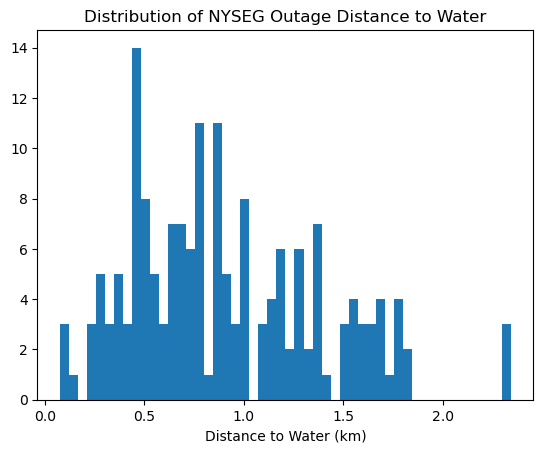

In [11]:
plt.hist(osprey_nests["nearest_waterbody_distance_km"], bins = 50)
plt.title("Distribution of NYSEG Outage Distance to Water")
plt.xlabel("Distance to Water (km)")

In [12]:
# Convert pandas DataFrame to GeoDataFrame
osprey_nests = gpd.GeoDataFrame(osprey_nests, geometry=gpd.points_from_xy(osprey_nests.faultlongitude, osprey_nests.faultlatitude))

In [13]:
geometry = [Point(xy) for xy in zip(osprey_nests.faultlongitude, osprey_nests.faultlatitude)]
crs = {'init': 'epsg:4326'}
osprey_nests_gdf = GeoDataFrame(osprey_nests, crs=crs, geometry=geometry)

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [14]:
osprey_nests_gdf

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,Unnamed: 0,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Bird Contact,UI,UI,41.164471,-73.231681,9001.0,5.0,13800.0,POINT (-73.23168 41.16447),4603.0,0.440850
1,Bird Contact,UI,UI,41.164471,-73.231681,11126.0,5.0,13800.0,POINT (-73.23168 41.16447),4603.0,0.440850
2,Bird Contact,UI,UI,41.164471,-73.231681,42269.0,5.0,13800.0,POINT (-73.23168 41.16447),4603.0,0.440850
3,Bird Contact,UI,UI,41.164471,-73.231681,60414.0,5.0,13800.0,POINT (-73.23168 41.16447),4603.0,0.440850
4,Bird Contact,UI,UI,41.203984,-73.278050,5985.0,2.0,13800.0,POINT (-73.27805 41.20398),4567.0,0.233153
...,...,...,...,...,...,...,...,...,...,...,...
1107,Bird Contact,UI,UI,41.171062,-73.153443,50657.0,725.0,13800.0,POINT (-73.15344 41.17106),4591.0,1.173303
1108,Bird Contact,UI,UI,41.171697,-73.152011,46548.0,1.0,13800.0,POINT (-73.15201 41.17170),4591.0,1.346246
1110,Bird Contact,UI,UI,41.275187,-72.941265,68966.0,32.0,13800.0,POINT (-72.94127 41.27519),4316.0,0.750097
1111,Bird Contact,UI,UI,41.195184,-73.198584,73441.0,16.0,13800.0,POINT (-73.19858 41.19518),2290.0,1.192537


<Axes: >

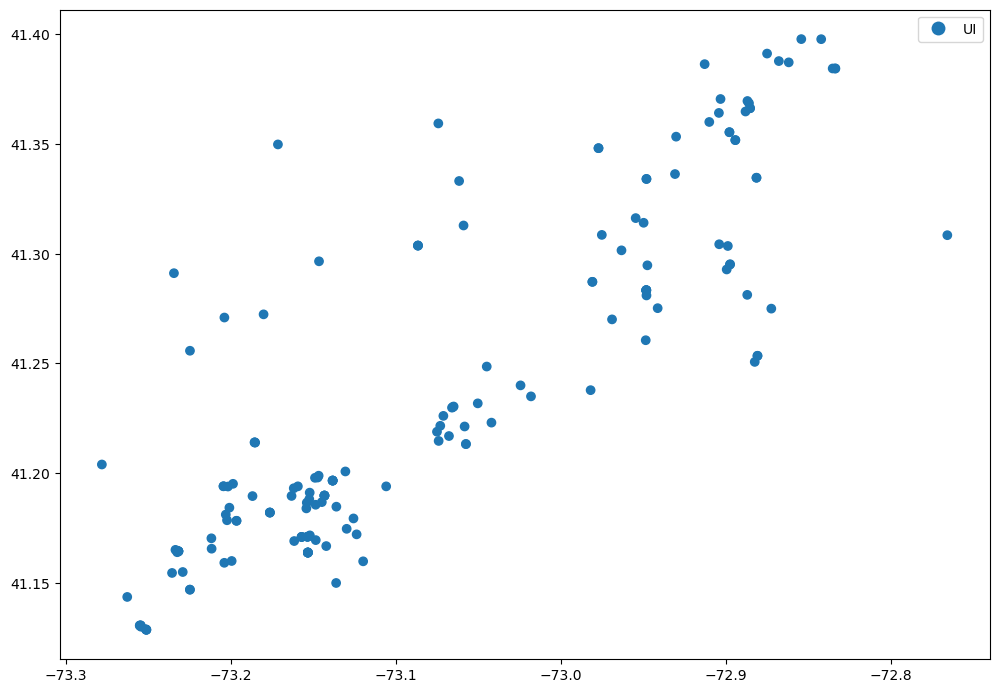

In [15]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
osprey_nests_gdf.plot(column='OPCO', k=5, legend=True, ax=ax)

<Axes: >

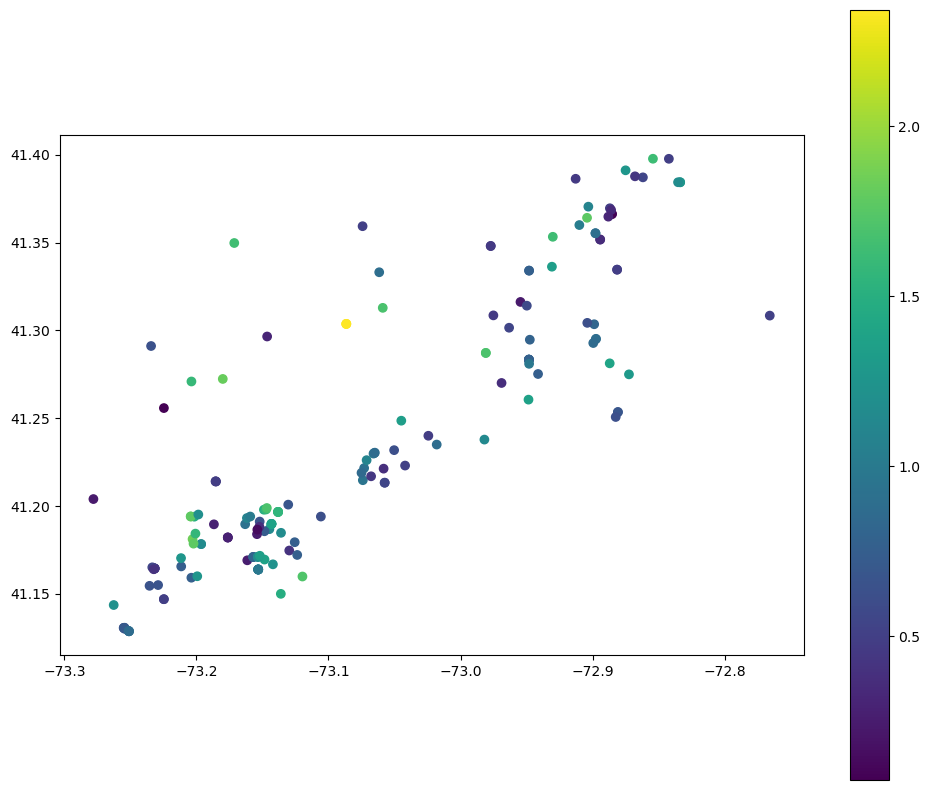

In [16]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
osprey_nests_gdf.plot(column='nearest_waterbody_distance_km', k=5, legend=True, ax=ax)

# Spatial Autocorrelation Analysis

In [19]:
df = osprey_nests_gdf
df = df.drop_duplicates(subset = ["geometry", "nearest_waterbody_distance_km"])
df

,CauseDesc,Division,OPCO,faultlatitude,faultlongitude,Unnamed: 0,CustomerCount,CircuitVoltage,geometry,nearest_waterbody_idx,nearest_waterbody_distance_km
0,Bird Contact,UI,UI,41.164471,-73.231681,9001.0,5.0,13800.0,POINT (-73.23168 41.16447),4603.0,0.440850
4,Bird Contact,UI,UI,41.203984,-73.278050,5985.0,2.0,13800.0,POINT (-73.27805 41.20398),4567.0,0.233153
5,Bird Contact,UI,UI,41.253498,-72.880776,8114.0,1.0,13800.0,POINT (-72.88078 41.25350),4418.0,0.686558
7,Bird Contact,UI,UI,41.397711,-72.842176,6763.0,5.0,13800.0,POINT (-72.84218 41.39771),3604.0,0.499173
8,Bird Contact,UI,UI,41.270923,-73.203807,11559.0,3.0,13800.0,POINT (-73.20381 41.27092),4404.0,1.592450
...,...,...,...,...,...,...,...,...,...,...,...
1105,Bird Contact,UI,UI,41.171062,-73.153443,50594.0,144.0,13800.0,POINT (-73.15344 41.17106),4591.0,1.173303
1108,Bird Contact,UI,UI,41.171697,-73.152011,46548.0,1.0,13800.0,POINT (-73.15201 41.17170),4591.0,1.346246
1110,Bird Contact,UI,UI,41.275187,-72.941265,68966.0,32.0,13800.0,POINT (-72.94127 41.27519),4316.0,0.750097
1111,Bird Contact,UI,UI,41.195184,-73.198584,73441.0,16.0,13800.0,POINT (-73.19858 41.19518),2290.0,1.192537


In [20]:
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

/var/folders/24/6ckwcq6s11dcd62_z_1k97_h0000gp/T/ipykernel_25856/1595884902.py:1: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  wq =  lps.weights.Queen.from_dataframe(df)


In [21]:
y = df['nearest_waterbody_distance_km']
ylag = lps.weights.lag_spatial(wq, y)

In [22]:
ylagq5 = mc.Quantiles(ylag, k=5)

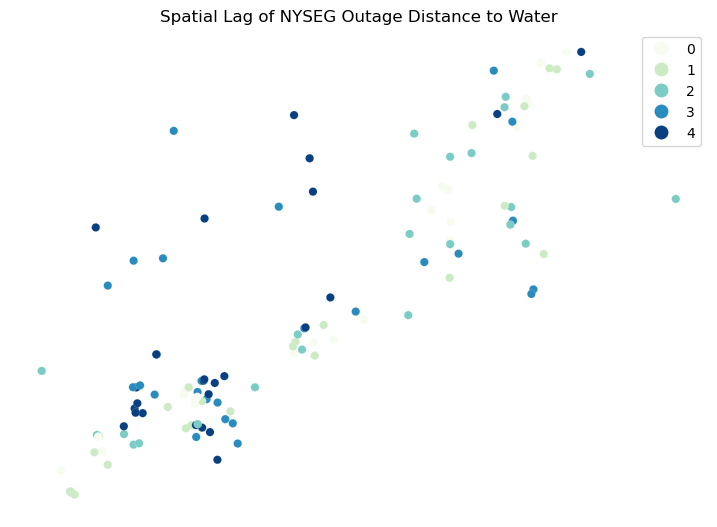

In [23]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("Spatial Lag of NYSEG Outage Distance to Water")

plt.show()

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


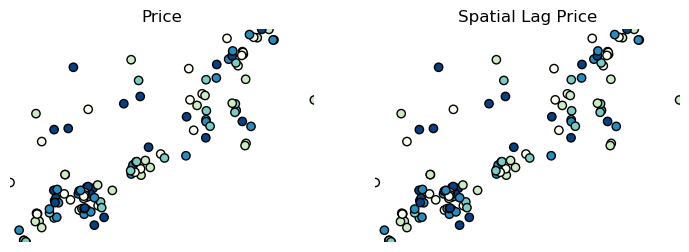

In [24]:
df['lag_median_pri'] = ylag
f,ax = plt.subplots(1,2,figsize=(2.16*4,4))
df.plot(column='nearest_waterbody_distance_km', ax=ax[0], edgecolor='k',
        scheme="quantiles",  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title("Price")
df.plot(column='nearest_waterbody_distance_km', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title("Spatial Lag Price")
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# Global Autocorrelation

In [25]:
wq.transform = 'r'
y = df['nearest_waterbody_distance_km']

In [26]:
np.random.seed(12345)
mi = esda.Moran(y, wq)
mi.I

0.19518694951034427

/var/folders/24/6ckwcq6s11dcd62_z_1k97_h0000gp/T/ipykernel_25856/2386594959.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sbn.kdeplot(mi.sim, shade=True)
/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, "Moran's I")

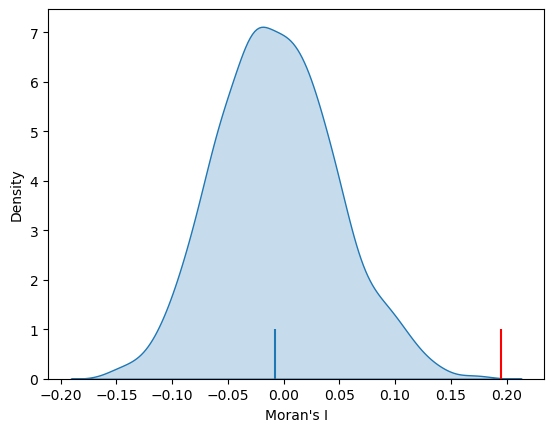

In [27]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel("Moran's I")

In [28]:
mi.p_sim

0.001

# Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers¶

In [29]:
wq.transform = 'r'
lag_price = lps.weights.lag_spatial(wq, df['nearest_waterbody_distance_km'])

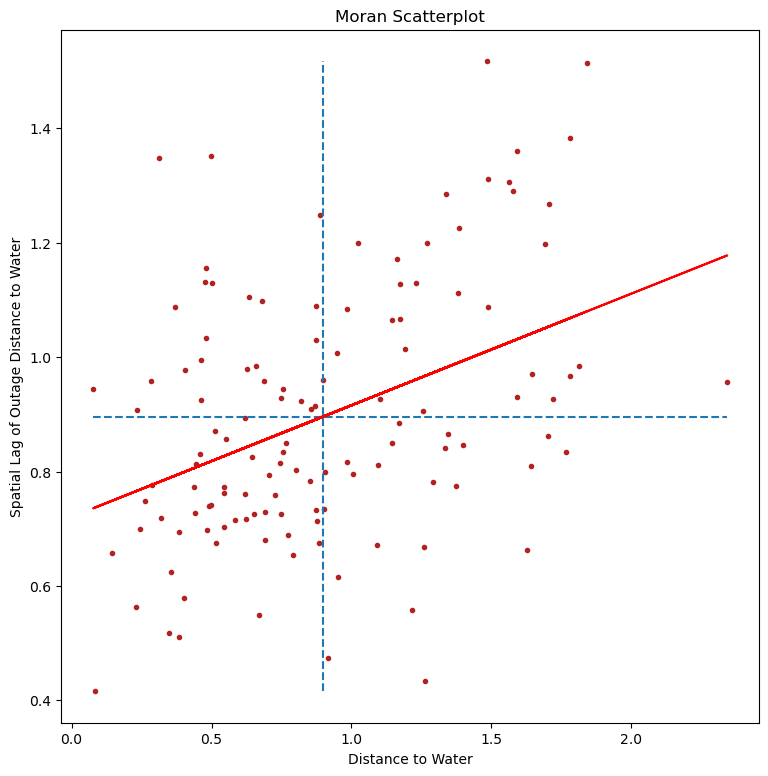

In [30]:
price = df['nearest_waterbody_distance_km']
b, a = np.polyfit(price, lag_price, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(price, lag_price, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(price.mean(), lag_price.min(), lag_price.max(), linestyle='--')
 # dashed horizontal at mean of lagged price
plt.hlines(lag_price.mean(), price.min(), price.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(price, a + b*price, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Outage Distance to Water')
plt.xlabel('Distance to Water')
plt.show()

In [31]:
li = esda.moran.Moran_Local(y, wq)

In [32]:
li_q = li.q

In [33]:
np.unique(li_q)

array([1, 2, 3, 4])

In [34]:
li.p_sim.min()

0.001

In [35]:
(li.p_sim < 0.001).sum()

0

In [36]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
spots = hotspot + coldspot + doughnut + diamond
spots
spot_labels = ['0 NS', '1 I', '2 II', '3 III', '4 IV']
labels = [spot_labels[i] for i in spots]

/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/plotting.py:314: UserWarning: You passed a edgecolor/edgecolors ('white') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  collection = ax.scatter(x, y, vmin=vmin, vmax=vmax, cmap=cmap, **kwargs)


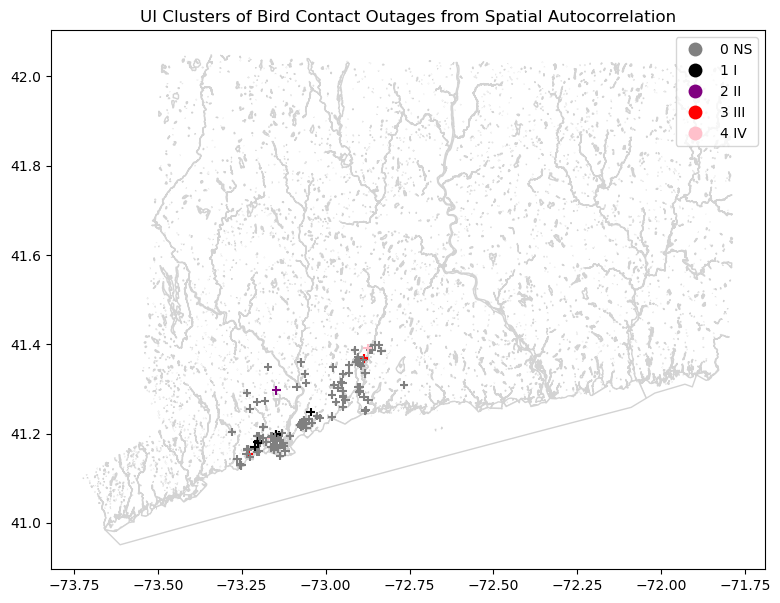

In [41]:
from matplotlib import colors
base = map_data.plot(color='white', edgecolor='lightgrey', figsize=(10,7))
hmap = colors.ListedColormap(['grey', 'black', 'purple', 'red', 'pink'])

# f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(marker = "+", column='cl', categorical=True, \
        k=2, cmap=hmap, ax=base, \
        edgecolor='white', legend=True)
ax.set_axis_off()
plt.title("UI Clusters of Bird Contact Outages from Spatial Autocorrelation")
plt.show()

In [39]:
df["labels"] = labels
df_hotspot = df[df["labels"] == "1 I"]
print(len(df_hotspot))
df_doughnut = df[df["labels"] == "2 II"]
print(len(df_doughnut))
df_coldspot= df[df["labels"] == "3 III"]
print(len(df_coldspot))
df_diamond = df[df["labels"] == "4 IV"]
print(len(df_diamond))
df_ns= df[df["labels"] == "0 NS"]
print(len(df_ns))

9
1
3
2
112


/Users/ZhongxuanChen/opt/anaconda3/lib/python3.9/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
